In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.metrics import classification_report

In [11]:
df = pd.read_csv('Gemstone_Dataset.csv')
classes_to_remove = ['Sphene', 'Sapphire', 'Purple', 'Pyrope', 'Goshenite', 'Garnet Red', 'Chrysoberyl', 'Brazilianite',  'Aquamarine',  'Almandine']
df_filtered = df[~df['class_label'].isin(classes_to_remove)]
df = df_filtered
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,class_label
0,0.909499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000037,0.000075,0.000150,...,0.513936,0.051240,0.167423,0.000165,0.000635,4.519627e-06,-2.366830e-10,-5.491861e-08,-5.119065e-11,Alexandrite
1,0.784037,0.000000,0.000000,0.002600,0.000000,0.011594,0.000000,0.000000,0.005243,0.000000,...,0.407965,0.091808,0.165255,0.000784,0.000001,1.780639e-08,2.296774e-15,-1.321221e-10,1.209063e-15,Alexandrite
2,0.970037,0.000763,0.001145,0.001145,0.001145,0.016180,0.000725,0.000280,0.002811,0.000114,...,0.678786,0.059389,0.161916,0.000017,0.000200,2.302139e-07,-1.551670e-12,-3.928424e-10,1.949298e-13,Alexandrite
3,0.810393,0.000947,0.000451,0.000857,0.000676,0.003292,0.001398,0.000721,0.002660,0.001939,...,0.421959,0.058819,0.233047,0.018589,0.000935,1.165659e-04,-3.661311e-08,-1.569542e-05,-1.184129e-08,Alexandrite
4,0.953279,0.000772,0.001524,0.001440,0.001586,0.010603,0.002066,0.000637,0.003652,0.000950,...,0.618850,0.043358,0.175302,0.000993,0.001322,4.422983e-05,1.066917e-08,1.394016e-06,-7.613963e-10,Alexandrite


In [13]:
df.shape

(4000, 114)

In [15]:
df.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03
mean,0.909241,0.040240,0.033279,0.051615,0.047034,0.026499,0.025802,0.011682,0.012457,0.011998,...,0.032843,0.629066,0.042688,0.206861,3.151792e-02,7.219161e-02,2.332167e-02,-1.436902e-01,-3.231833e-02,1.223422e-01
std,0.103421,0.096448,0.080441,0.113148,0.115746,0.070295,0.084569,0.044799,0.045705,0.044127,...,0.011743,0.122605,0.020576,0.262620,5.429744e-01,2.145466e+00,4.771738e-01,1.227417e+01,1.348251e+00,7.139330e+00
min,0.221033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003408,0.246278,0.002692,0.159156,2.762120e-09,2.146828e-10,1.450631e-14,-7.433449e+02,-7.568195e+01,-1.847178e+01
25%,0.877853,0.000241,0.000219,0.000590,0.000346,0.000767,0.000286,0.000110,0.000205,0.000039,...,0.024714,0.540981,0.027449,0.162885,3.240411e-04,5.085426e-06,5.374159e-08,-1.773528e-13,-4.218722e-09,-1.705604e-12
50%,0.947597,0.002063,0.001836,0.003190,0.002315,0.004524,0.002001,0.000737,0.001325,0.000431,...,0.032105,0.636227,0.039703,0.166826,1.407420e-03,4.501243e-05,6.545113e-07,2.771279e-16,5.443317e-12,9.670153e-22
75%,0.979474,0.024350,0.022535,0.034450,0.023207,0.017597,0.011036,0.003904,0.004692,0.003109,...,0.040160,0.719370,0.054152,0.178158,3.845242e-03,2.489129e-04,7.274113e-06,1.193337e-11,3.057515e-08,1.195536e-12
max,1.000000,0.824824,0.798962,0.951546,0.924301,0.845281,0.871359,0.761084,0.699037,0.734506,...,0.089616,0.957475,0.163229,9.657543,2.145177e+01,1.218662e+02,1.852107e+01,1.653339e+02,7.583178e+00,4.489482e+02


In [17]:
df['class_label'].value_counts()

class_label
Alexandrite      50
Amazonite        50
Rhodonite        50
Rhodolite        50
Rhodochrosite    50
                 ..
Diaspore         50
Diamond          50
Danburite        50
Coral            50
Zoisite          50
Name: count, Length: 80, dtype: int64

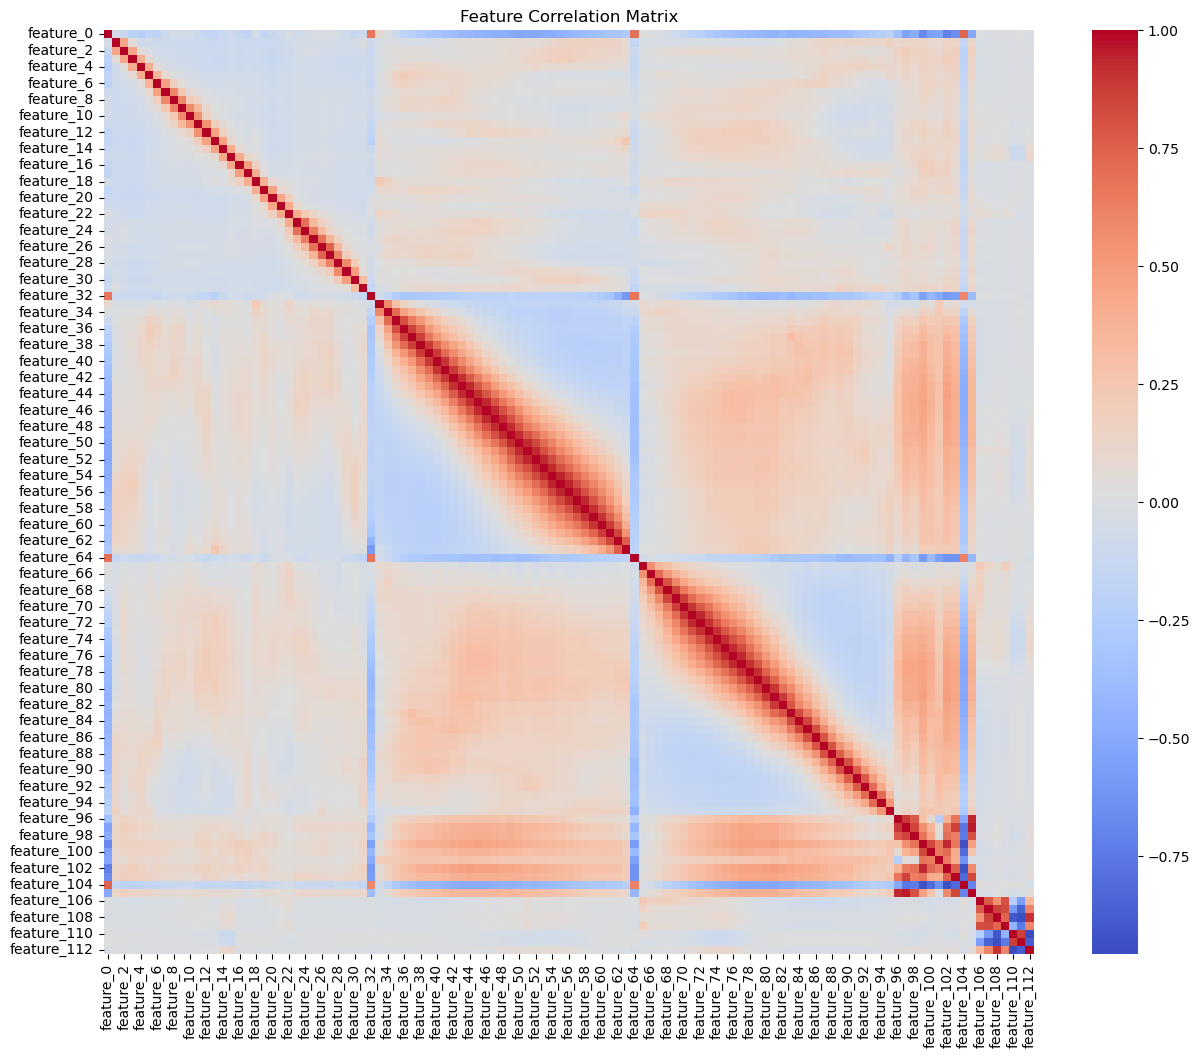

In [19]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 12))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

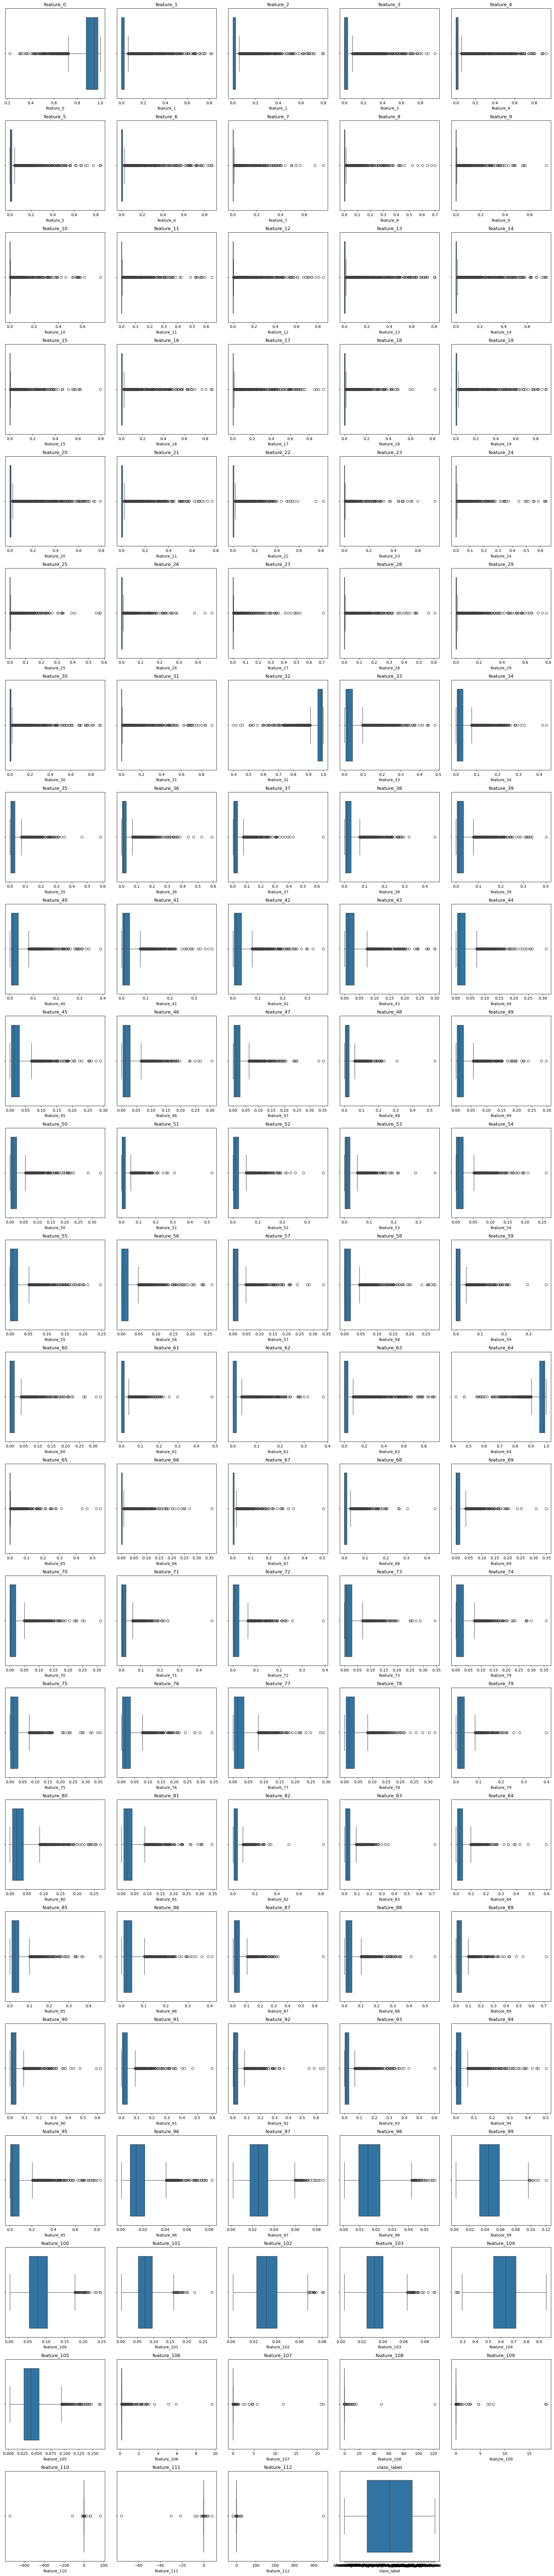

In [21]:
import math
num_cols = len(df.columns)
ncols = 5  # Number of subplots per row
nrows = math.ceil(num_cols / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [22]:
X = df.drop('class_label', axis=1)
y = df['class_label']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['class_label'])

In [24]:
le = StandardScaler()
X_train_sc = le.fit_transform(X_train)
X_test_sc = le.transform(X_test)

In [25]:
pt = PowerTransformer(method='yeo-johnson')
X_train_yeo = pt.fit_transform(X_train_sc)
X_test_yeo = pt.transform(X_test_sc)

In [26]:
pca = PCA(n_components=60)
X_train_trf = pca.fit_transform(X_train_yeo)
X_test_trf = pca.transform(X_test_yeo)

# Checked on different n_components, the accuracy drops

In [27]:
lr = LogisticRegression(penalty='l2', C=1.0, solver='newton-cholesky', random_state=42)

lr.fit(X_train_trf, y_train)

y_pred_lr = lr.predict(X_test_trf)

accuracy_score(y_test, y_pred_lr)

0.61375

In [28]:
print(classification_report(y_test, y_pred_lr))

                   precision    recall  f1-score   support

      Alexandrite       0.50      0.30      0.38        10
        Amazonite       0.75      0.60      0.67        10
            Amber       0.39      0.70      0.50        10
         Amethyst       0.43      0.30      0.35        10
         Ametrine       0.71      1.00      0.83        10
       Andalusite       0.56      0.50      0.53        10
        Andradite       0.18      0.20      0.19        10
 Aventurine Green       0.80      0.80      0.80        10
Aventurine Yellow       0.78      0.70      0.74        10
        Benitoite       0.64      0.70      0.67        10
     Beryl Golden       0.30      0.30      0.30        10
          Bixbite       0.64      0.70      0.67        10
       Bloodstone       0.88      0.70      0.78        10
  Blue Lace Agate       0.82      0.90      0.86        10
        Carnelian       0.75      0.60      0.67        10
         Cats Eye       0.58      0.70      0.64       

In [29]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

In [30]:
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)

knn.fit(X_train_trf, y_train_le)

y_pred_knn = knn.predict(X_test_trf)

accuracy_score(y_test_le, y_pred_knn)

C:\Users\hamad\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\hamad\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\hamad\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hamad\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\hamad\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

0.55

In [31]:
rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(X_train_trf, y_train)

y_pred_rfc = rfc.predict(X_test_trf)

accuracy_score(y_test, y_pred_rfc)

0.61625

In [32]:
print(classification_report(y_test, y_pred_rfc))

                   precision    recall  f1-score   support

      Alexandrite       1.00      0.50      0.67        10
        Amazonite       0.75      0.60      0.67        10
            Amber       0.39      0.70      0.50        10
         Amethyst       0.36      0.40      0.38        10
         Ametrine       0.69      0.90      0.78        10
       Andalusite       0.60      0.60      0.60        10
        Andradite       0.14      0.10      0.12        10
 Aventurine Green       0.88      0.70      0.78        10
Aventurine Yellow       0.78      0.70      0.74        10
        Benitoite       0.43      0.60      0.50        10
     Beryl Golden       0.17      0.10      0.12        10
          Bixbite       0.67      0.80      0.73        10
       Bloodstone       0.75      0.60      0.67        10
  Blue Lace Agate       0.69      0.90      0.78        10
        Carnelian       0.64      0.70      0.67        10
         Cats Eye       0.89      0.80      0.84       

In [33]:
svm_linear = SVC(kernel="linear")

svm_linear.fit(X_train_trf, y_train_le)

y_pred_svmL = svm_linear.predict(X_test_trf)

accuracy_score(y_test_le, y_pred_svmL)

0.615

In [34]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_trf, y_train_le)
y_pred_XG = model.predict(X_test_trf)
accuracy_score(y_test_le, y_pred_XG)

0.5525